In [52]:
import numpy as np
import pandas as pd

In [53]:
file_path = '../extracted_data/diabetes.csv'
df = pd.read_csv(file_path)

* ### **Exploratory Data Analysis**

In [54]:
# First 10 rows of the dataset
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [55]:
# Structural summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [56]:
# Descriptive statistics of the dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [57]:
# Analyzing cardinality
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

* Visualizing the class balance for Outcome

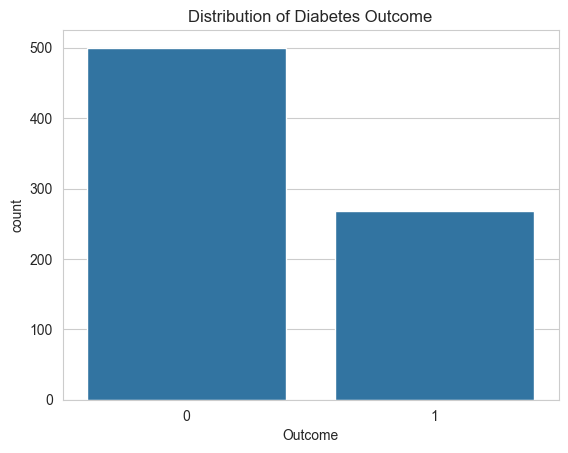

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

ax = sns.countplot(x='Outcome', data=df)
ax.set_title('Distribution of Diabetes Outcome')
plt.show()

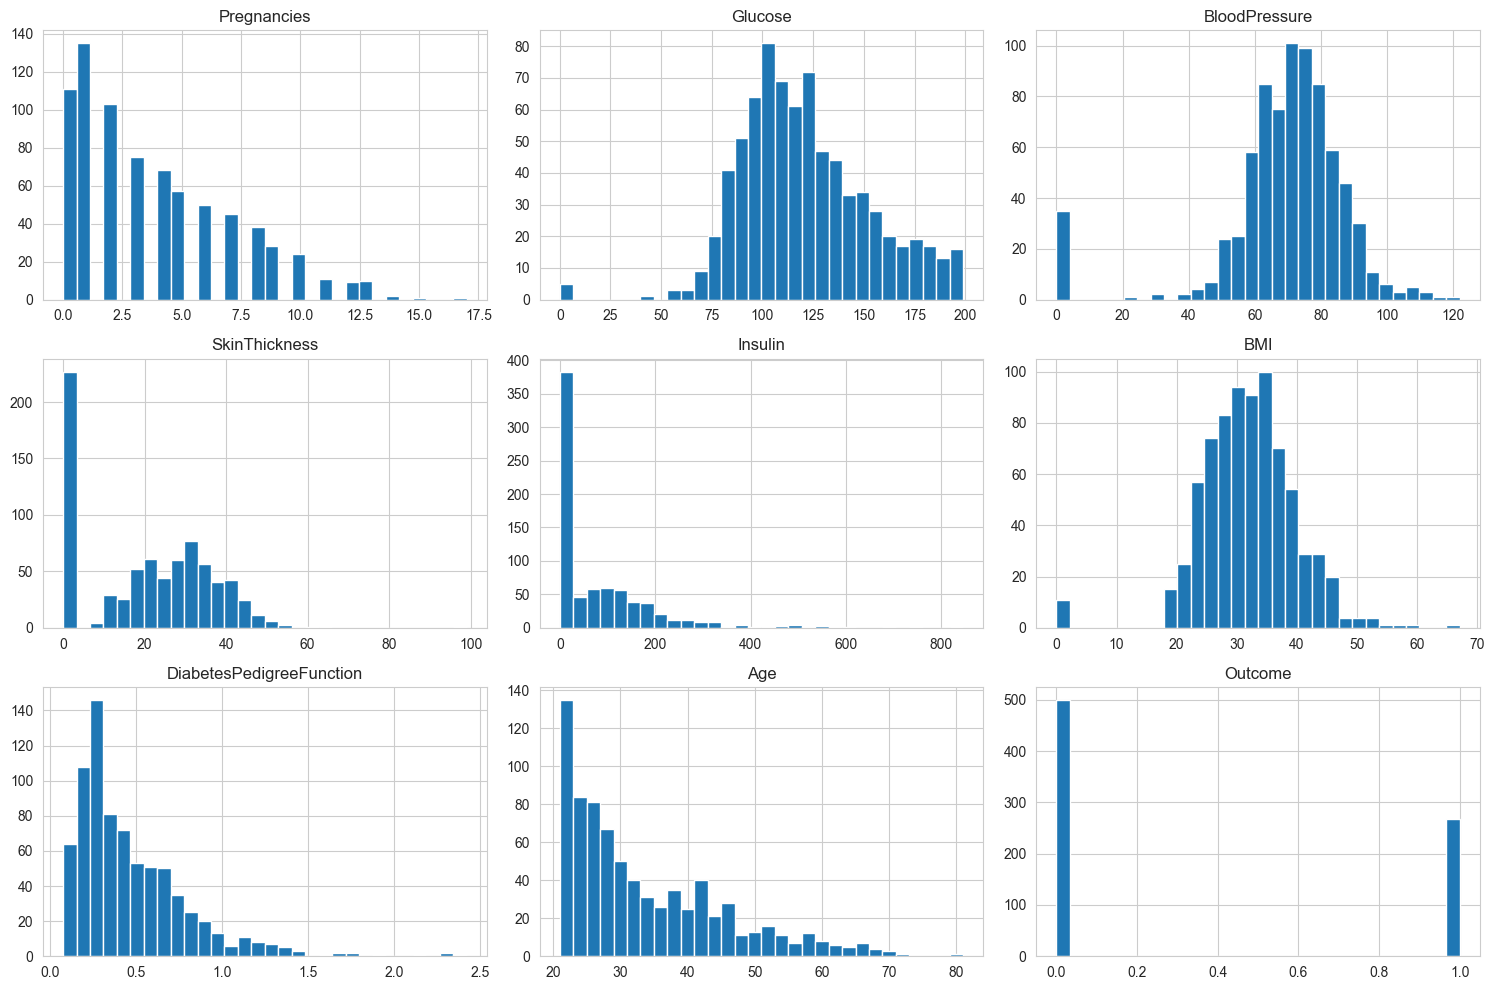

In [59]:
# Feature distribution with histogram
df.hist(figsize=(15,10), bins=30, layout=(3,3))
plt.tight_layout()
plt.show()

* Detecting outliers with boxplot

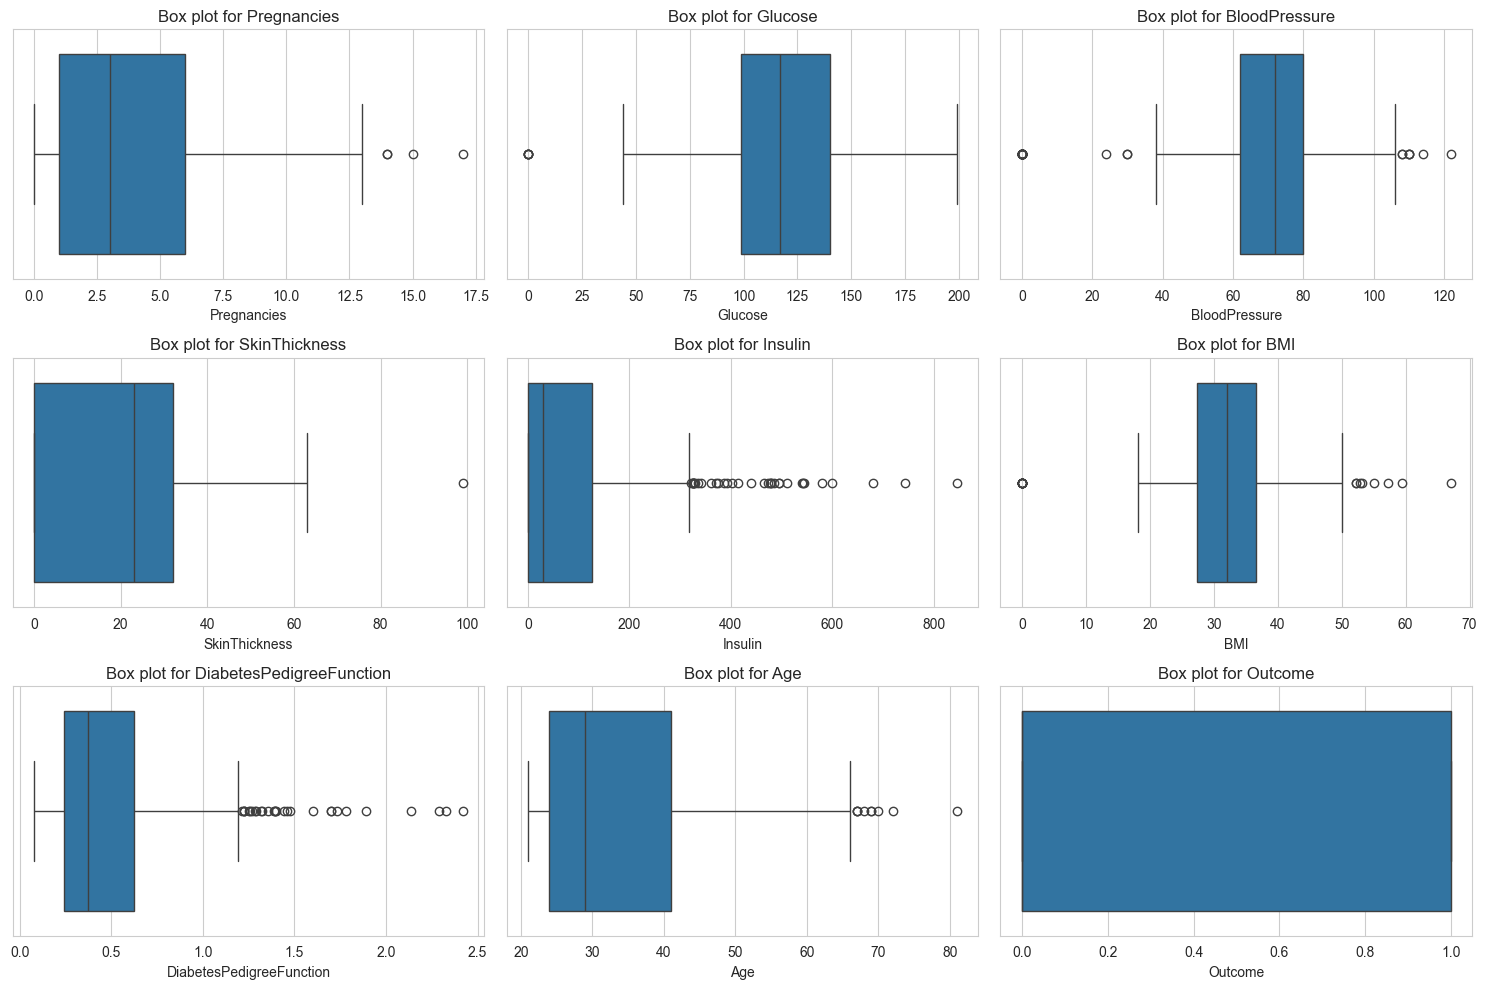

In [60]:
# detecting outliers with boxplot
fix, axes = plt.subplots(3,3, figsize=(15,10))

for ax, col in zip(axes.flatten(),  df.columns):
    sns.boxplot(x=col, data=df, ax=ax)
    ax.set_title(f"Box plot for {col}")
plt.tight_layout()
plt.show()

* Bivariate Analysis

In [61]:
# Bivariate analysis with a Correlation matrix
correlation_matrix = df.corr()
correlation_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


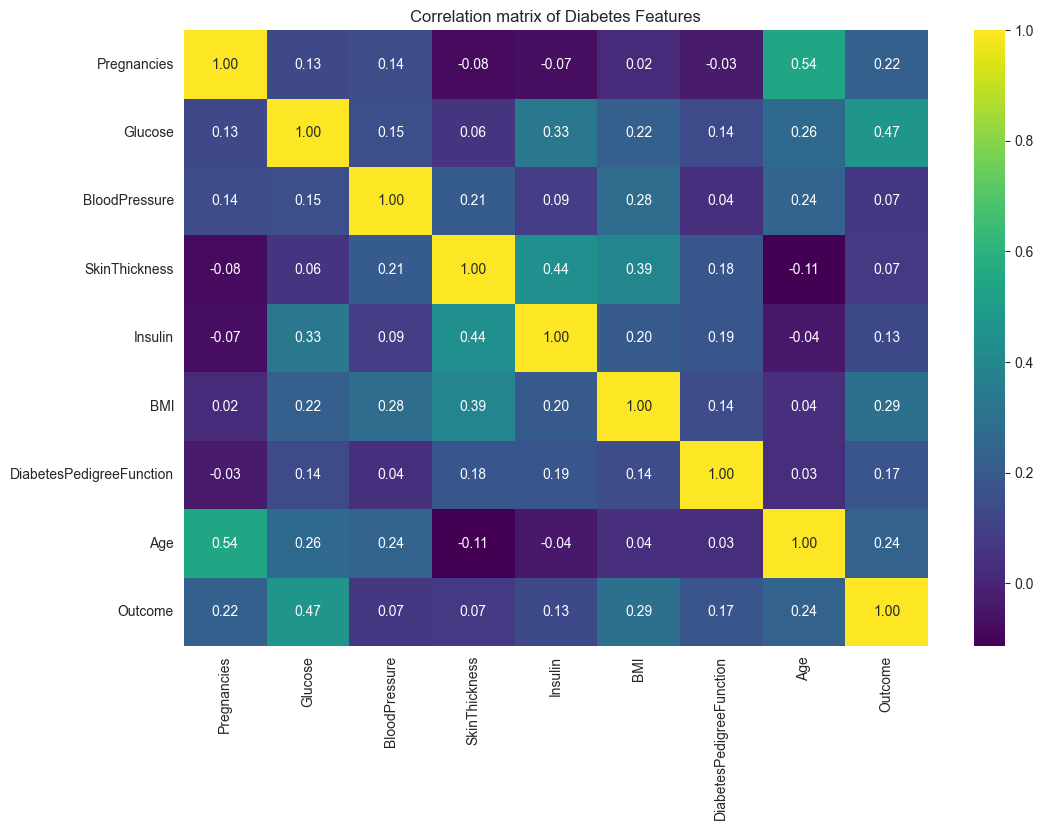

In [62]:
# Correlation matrix with seaborn heatmap
plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title("Correlation matrix of Diabetes Features")
plt.show()

* ### **Data Cleaning & Preprocessing**

* Identifying Zero Invalid Values

In [63]:
columns_with_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
print("A peek at the data in the identified columns:")
df[columns_with_zeros].head()

A peek at the data in the identified columns:


,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148,72,35,0,33.6
1,85,66,29,0,26.6
2,183,64,0,0,23.3
3,89,66,23,94,28.1
4,137,40,35,168,43.1


In [64]:
df[columns_with_zeros] = df[columns_with_zeros].replace(0, np.nan)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [65]:
# Finding mising values
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

* Handling missing values using SimpleImputer 

In [66]:
from src.handle_missing_values import simple_impute
df_imputed = simple_impute(df)
df_imputed.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


* Splitting the dataset into training and testing set

In [67]:
X = df_imputed.drop('Outcome', axis=1)
y = df_imputed['Outcome']

In [68]:
from src.split_data import split_data
X_train, X_test, y_train, y_test = split_data(df_imputed)

In [69]:
print('Shape of X_train :', X_train.shape)
print('Shape of y_train :', y_train.shape)
print("=" * 30)
print('Shape of X_test :', X_test.shape)
print('Shape of y_test :', y_test.shape)

Shape of X_train : (614, 8)
Shape of y_train : (614,)
Shape of X_test : (154, 8)
Shape of y_test : (154,)


* **Feature Scaling**

In [70]:
from src.preprocessing import preprocess_data

X_train_scaled, X_test_scaled = preprocess_data(X_train, X_test)

In [71]:
# few rows of scaled data
X_train_scaled[:5]

array([[-0.85135507, -1.05642747, -0.82674004, -1.91818693, -1.20336073,
        -0.76947697,  0.31079384, -0.79216928],
       [ 0.35657564,  0.14439907,  0.47777235, -0.22987447, -1.47019479,
        -0.41749769, -0.11643851,  0.56103382],
       [-0.5493724 , -0.55608308, -1.15286813,  1.23332967, -0.55533518,
         0.3597899 , -0.76486207, -0.70759409],
       [-0.85135507,  0.81152492, -1.31593218, -0.00476614, -0.16143729,
        -0.40283188,  0.26231357, -0.36929331],
       [-1.15333775, -0.88964601, -0.66367599,  1.12077551, -0.41556496,
         1.78237284, -0.33762972, -0.96131967]])

* ### **Base Models Training & Evaluation**

* #### **logistic Regression**

In [72]:
from pipeline_models.logistic_regression import train_logistic_regression, predict_logistic_regression

log_reg = train_logistic_regression(X_train_scaled, y_train)
y_pred_log_reg = predict_logistic_regression(log_reg, X_test_scaled)
print("Training and Fitting Logistic Regression :")
log_reg

Training and Fitting Logistic Regression :


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multi

In [73]:
print("First 20 predictions:")
print(y_pred_log_reg[:20])

print("\nFirst 20 true labels:")
print(y_test[:20].values)

print("\nShapes:")
print("Predictions shape:", y_pred_log_reg.shape)
print("True labels shape:", y_test.shape)

First 20 predictions:
[1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]

First 20 true labels:
[0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0.]

Shapes:
Predictions shape: (154,)
True labels shape: (154,)


Accuracy of Logistic Regression : 0.7077922077922078
Classification Report of Logistic Regression:
               precision    recall  f1-score   support

         0.0       0.75      0.82      0.78       100
         1.0       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154

Confusion Matrix:
 [[82 18]
 [27 27]]


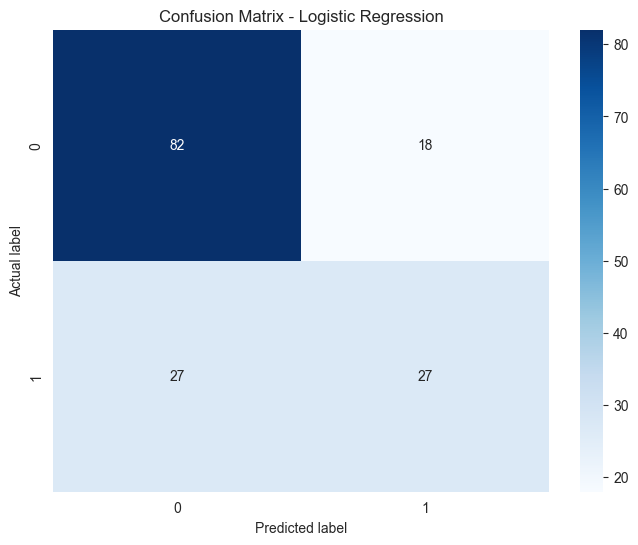

In [74]:
from pipeline_models.reports import evaluate_classification_report, plot_confusion_matrix

acc_log_reg, report_log_reg, cm_log_reg = evaluate_classification_report(y_test, y_pred_log_reg)

print("Accuracy of Logistic Regression :", acc_log_reg)
print("Classification Report of Logistic Regression:\n", report_log_reg)
print("Confusion Matrix:\n", cm_log_reg)

plot_confusion_matrix(cm_log_reg, model="Logistic Regression")

* #### **KNeighbors classifier**

In [75]:
from pipeline_models.kneighbors import train_kneighbors, predict_kneighbors
knn_model = train_kneighbors(X_train_scaled, y_train)
y_pred_knn_model = predict_kneighbors(knn_model, X_test_scaled)
print("Training and fitting KNeighborsCalssifier :")
knn_model

Training and fitting KNeighborsCalssifier :


,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [76]:
print("First 20 predictions:")
print(y_pred_knn_model[:20])

print("\nFirst 20 true labels:")
print(y_test[:20].values)

print("\nShapes:")
print("Predictions shape:", y_pred_knn_model.shape)
print("True labels shape:", y_test.shape)

First 20 predictions:
[1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0.]

First 20 true labels:
[0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0.]

Shapes:
Predictions shape: (154,)
True labels shape: (154,)


Accuracy of KNeighborsClassifier : 0.7532467532467533
Classification Report of KNeighborsClassifier :
               precision    recall  f1-score   support

         0.0       0.80      0.83      0.81       100
         1.0       0.66      0.61      0.63        54

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154

Confusion Matrix:
 [[83 17]
 [21 33]]


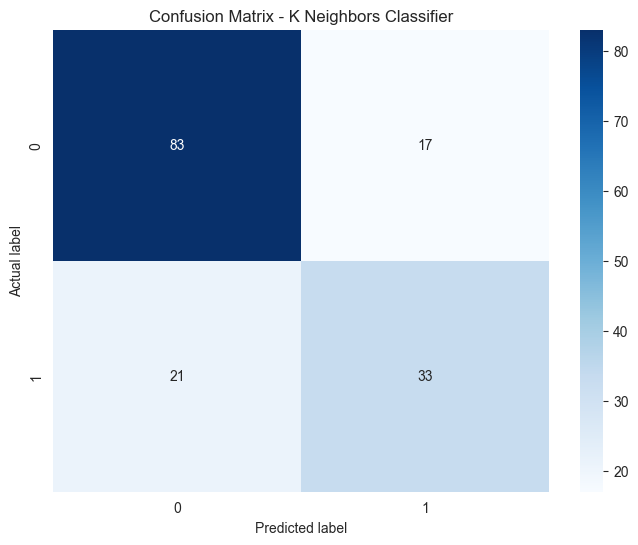

In [77]:
from pipeline_models.reports import evaluate_classification_report, plot_confusion_matrix

acc_knn_model, report_knn_model, cm_knn_model = evaluate_classification_report(y_test, y_pred_knn_model)

print("Accuracy of KNeighborsClassifier :", acc_knn_model)
print("Classification Report of KNeighborsClassifier :\n", report_knn_model)
print("Confusion Matrix:\n", cm_knn_model)

# confusion matrix
plot_confusion_matrix(cm_knn_model, model="K Neighbors Classifier")

In [78]:
from sklearn.metrics import classification_report
report_log_reg = classification_report(y_test, y_pred_log_reg, target_names=['Non-Diabetic (0)', 'Diabetic (1)'], output_dict=True)
report_knn_model = classification_report(y_test, y_pred_knn_model, target_names=['Non-Diabetic (0)', 'Diabetic (1)'], output_dict=True)


f1_log_reg = report_log_reg['Diabetic (1)']['f1-score']
f1_knn = report_knn_model['Diabetic (1)']['f1-score']

print(f"--- F1-Score Comparison ---")
print(f"Logistic Regression F1-Score (Diabetic Class): {f1_log_reg:.4f}")
print(f"K-Nearest Neighbors F1-Score (Diabetic Class): {f1_knn:.4f}")

print("\\n--- Initial Conclusion ---")
if f1_log_reg > f1_knn:
    print("Based on the F1-Score, the Logistic Regression model is the initial best performer.")
elif f1_knn > f1_log_reg:
    print("Based on the F1-Score, the K-Nearest Neighbors model is the initial best performer.")
else:
    print("Based on the F1-Score, both models have nearly identical performance.")

--- F1-Score Comparison ---
Logistic Regression F1-Score (Diabetic Class): 0.5455
K-Nearest Neighbors F1-Score (Diabetic Class): 0.6346
\n--- Initial Conclusion ---
Based on the F1-Score, the K-Nearest Neighbors model is the initial best performer.


* ## **Advanced Model Training**

* #### **Random Forest**

In [79]:
from pipeline_models.random_forest import train_random_forest, predict_random_forest
rf_model = train_random_forest(X_train_scaled, y_train)
y_pred_rf_model = predict_random_forest(rf_model, X_test_scaled)
print("Traning and fitting Random Forest Classifier :")
rf_model

Traning and fitting Random Forest Classifier :


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [80]:
print("First 20 predictions:")
print(y_pred_rf_model[:20])

print("\nFirst 20 true labels:")
print(y_test[:20].values)

print("\nShapes:")
print("Predictions shape:", y_pred_rf_model.shape)
print("True labels shape:", y_test.shape)

First 20 predictions:
[1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0.]

First 20 true labels:
[0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0.]

Shapes:
Predictions shape: (154,)
True labels shape: (154,)


Accuracy of Random Forest Classifier : 0.7402597402597403
Classification Report of Random Forest Classifier:
               precision    recall  f1-score   support

         0.0       0.78      0.83      0.81       100
         1.0       0.65      0.57      0.61        54

    accuracy                           0.74       154
   macro avg       0.71      0.70      0.71       154
weighted avg       0.73      0.74      0.74       154

Confusion Matrix:
 [[83 17]
 [23 31]]


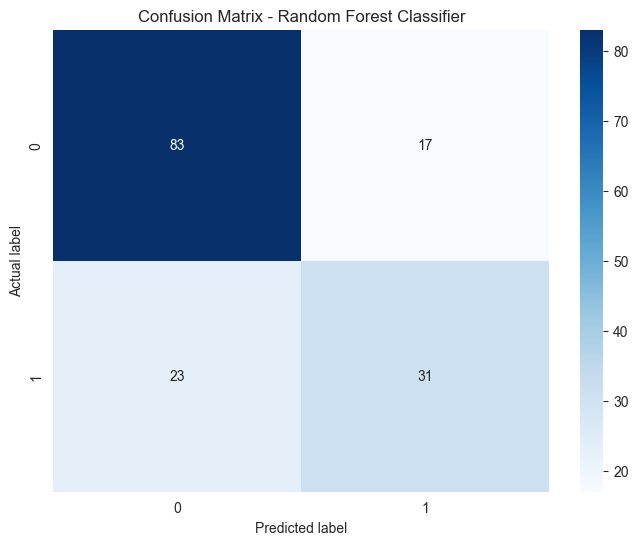

In [81]:
from pipeline_models.reports import evaluate_classification_report, plot_confusion_matrix

acc_rf_model, report_rf_model, cm_rf_model = evaluate_classification_report(y_test, y_pred_rf_model)

print("Accuracy of Random Forest Classifier :", acc_rf_model)
print("Classification Report of Random Forest Classifier:\n", report_rf_model)
print("Confusion Matrix:\n", cm_rf_model)
# Connfusion model for Random Forest
plot_confusion_matrix(cm_rf_model, model="Random Forest Classifier")

* #### **XGBoost Classifier**

In [82]:
from pipeline_models.xgboost import train_xgboost, predict_xgboost
xgboost_model = train_xgboost(X_train_scaled, y_train)
y_pred_xgboost_model = predict_xgboost(xgboost_model, X_test_scaled)
print("Training and Fitting XGBoost Classifier :")
xgboost_model

c:\Users\G Ajay kumar\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning: [16:52:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "eval_metrics", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training and Fitting XGBoost Classifier :


,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

In [83]:
print("First 20 predictions:")
print(y_pred_xgboost_model[:20])

print("\nFirst 20 true labels:")
print(y_test[:20].values)

print("\nShapes:")
print("Predictions shape:", y_pred_xgboost_model.shape)
print("True labels shape:", y_test.shape)

First 20 predictions:
[1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0]

First 20 true labels:
[0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0.]

Shapes:
Predictions shape: (154,)
True labels shape: (154,)


Accuracy of XGBoost Classifier : 0.7467532467532467
Classification Report of XGBoost Classifier :
               precision    recall  f1-score   support

         0.0       0.79      0.83      0.81       100
         1.0       0.65      0.59      0.62        54

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.74      0.75      0.74       154

Confusion Matrix:
 [[83 17]
 [22 32]]


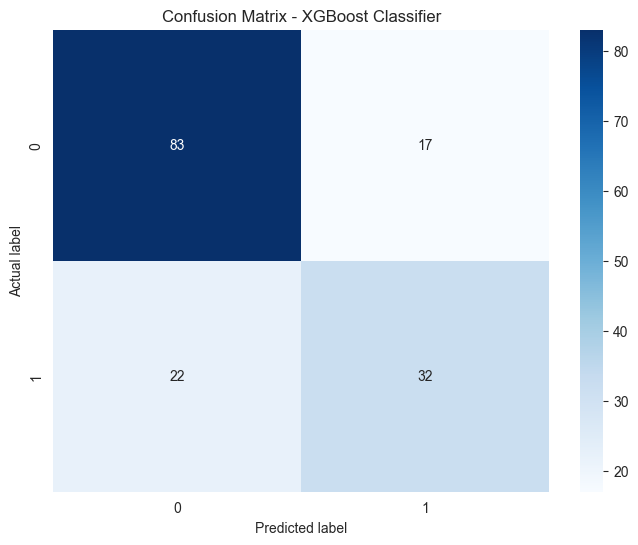

In [84]:
from pipeline_models.reports import evaluate_classification_report, plot_confusion_matrix

acc_xgboost_model, report_xgboost_model, cm_xgboost_model = evaluate_classification_report(y_test, y_pred_xgboost_model)

print("Accuracy of XGBoost Classifier :", acc_xgboost_model)
print("Classification Report of XGBoost Classifier :\n", report_xgboost_model)
print("Confusion Matrix:\n", cm_xgboost_model)

# Confusion matrix of XGBoost model
plot_confusion_matrix(cm_xgboost_model, model="XGBoost Classifier")

In [85]:
from sklearn.metrics import classification_report, confusion_matrix

report_log_reg = classification_report(y_test, y_pred_log_reg, target_names=['Non-Diabetic (0)', 'Diabetic (1)'], output_dict=True)
report_knn_model = classification_report(y_test, y_pred_knn_model, target_names=['Non-Diabetic (0)', 'Diabetic (1)'], output_dict=True)
report_rf_model = classification_report(y_test, y_pred_rf_model, target_names=['Non-Diabetic (0)', 'Diabetic (1)'], output_dict=True)
report_xgboost_model = classification_report(y_test, y_pred_xgboost_model, target_names=['Non-Diabetic (0)', 'Diabetic (1)'], output_dict=True)

performance_summary = {
    'Logistic Regression': {
        'Precision': report_log_reg['Diabetic (1)']['precision'],
        'Recall': report_log_reg['Diabetic (1)']['recall'],
        'F1-Score': report_log_reg['Diabetic (1)']['f1-score'],
    },
    'K-Nearest Neighbors': {
        'Precision': report_knn_model['Diabetic (1)']['precision'],
        'Recall': report_knn_model['Diabetic (1)']['recall'],
        'F1-Score': report_knn_model['Diabetic (1)']['f1-score'],
    },
    'Random Forest': {
        'Precision': report_rf_model['Diabetic (1)']['precision'],
        'Recall': report_rf_model['Diabetic (1)']['recall'],
        'F1-Score': report_rf_model['Diabetic (1)']['f1-score'],
    },
    'XGBoost': {
        'Precision': report_xgboost_model['Diabetic (1)']['precision'],
        'Recall': report_xgboost_model['Diabetic (1)']['recall'],
        'F1-Score': report_xgboost_model['Diabetic (1)']['f1-score'],
    }
}
# Extracting FP and Fn from confusion matrix
all_cms = {
    'Logistic Regression': cm_log_reg,
    'K-Nearest Neighbors': cm_knn_model,
    'Random Forest': cm_rf_model,
    'XGBoost': cm_xgboost_model
}

for model_name, model_cm in all_cms.items():
    performance_summary[model_name]['False Positives'] = model_cm[0, 1]
    performance_summary[model_name]['False Negatives'] = model_cm[1, 0]

performance_df = pd.DataFrame.from_dict(performance_summary, orient='index') # dict to index
performance_df = performance_df[['F1-Score', 'Recall', 'Precision', 'False Negatives', 'False Positives']]
print("--- Model Performance Comparison ---")
display(performance_df.style.background_gradient(cmap='viridis', subset=['F1-Score', 'Recall'])
                          .highlight_min(subset=['False Negatives'], color='lightcoral'))

--- Model Performance Comparison ---


,F1-Score,Recall,Precision,False Negatives,False Positives
Logistic Regression,0.545455,0.500000,0.600000,27,18
K-Nearest Neighbors,0.634615,0.611111,0.660000,21,17
Random Forest,0.607843,0.574074,0.645833,23,17
XGBoost,0.621359,0.592593,0.653061,22,17


* ## **Hyperparameter Tuning**

In [86]:
best_model = rf_model
best_model_name = "Random Forest"
print("The selected best performance model is :", best_model_name)

The selected best performance model is : Random Forest


In [87]:
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced', 'balanced_subsample']
}
print("Parameter Grid for Random Forest :\n", param_grid_rf)

num_combinations = 1
for key in param_grid_rf:
    num_combinations *= len(param_grid_rf[key])
print(f"\nTotal number of combinations to test: {num_combinations}")

Parameter Grid for Random Forest :
 {'n_estimators': [100, 200], 'max_depth': [None, 5, 10, 15], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'max_features': ['sqrt', 'log2'], 'class_weight': ['balanced', 'balanced_subsample']}

Total number of combinations to test: 288


In [88]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    estimator = best_model,
    param_grid = param_grid_rf,
    scoring='f1',
    cv=5, 
    n_jobs=-1,
    verbose=2
)
grid_search

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestC...ndom_state=42)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'class_weight': ['balanced', 'balanced_subsample'], 'max_depth': [None, 5, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2, ...], ...}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'f1'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation ti

In [89]:
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestC...ndom_state=42)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'class_weight': ['balanced', 'balanced_subsample'], 'max_depth': [None, 5, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2, ...], ...}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'f1'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation ti

In [90]:
best_params = grid_search.best_params_
print(best_params)

{'class_weight': 'balanced_subsample', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [91]:
best_cv_score = grid_search.best_score_
print(best_cv_score)

0.7082956439185584


In [92]:
try:
    original_f1_score = performance_df.loc[best_model_name, 'F1-Score']
    
    print(f"\n--- Performance Improvement Analysis ---")
    print(f"Original, untuned model's F1-score on the test set: {original_f1_score:.4f}")
    print(f"Tuned model's cross-validation F1-score: {best_cv_score:.4f}")
    
    improvement = best_cv_score - original_f1_score
    print(f"Improvement from hyperparameter tuning: {improvement:+.4f}")
    
except NameError:
    print("\nRun the previous steps to create 'performance_df' and 'best_model_name' for a full comparison.")


--- Performance Improvement Analysis ---
Original, untuned model's F1-score on the test set: 0.6078
Tuned model's cross-validation F1-score: 0.7083
Improvement from hyperparameter tuning: +0.1005


--- The Final Tuned Model ---
RandomForestClassifier(class_weight='balanced_subsample', max_depth=5,
                       max_features='log2', min_samples_split=5,
                       n_estimators=200, n_jobs=-1, random_state=42)




--- Final Tuned Model Classification Report (on Test Set) ---
                  precision    recall  f1-score   support

Non-Diabetic (0)       0.84      0.75      0.79       100
    Diabetic (1)       0.62      0.74      0.67        54

        accuracy                           0.75       154
       macro avg       0.73      0.75      0.73       154
    weighted avg       0.76      0.75      0.75       154


--- Final Tuned Model Confusion Matrix (on Test Set) ---


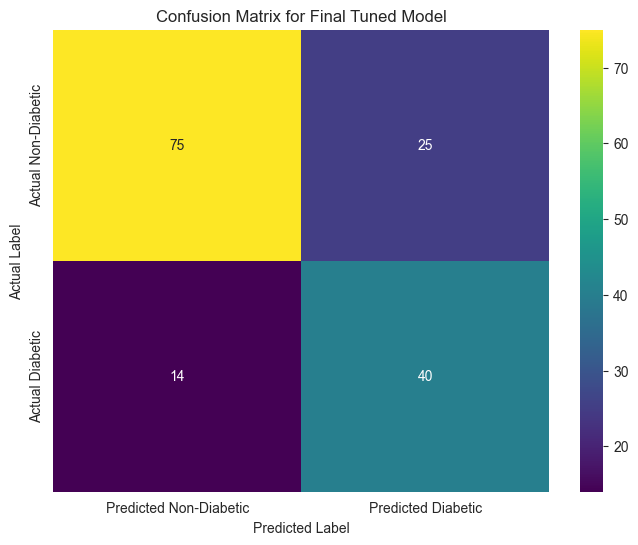



--- Performance Showdown: Tuned vs. Untuned Model on the Test Set ---


,Original Random Forest,Final Tuned Random Forest
Metric,,
F1-Score,0.6078,0.6723
Recall,0.5741,0.7407
False Negatives (Critical),23,14


In [93]:
final_model = grid_search.best_estimator_

print("--- The Final Tuned Model ---")
print(final_model)

# Make predictions on the test set using the final model
y_pred_final = final_model.predict(X_test_scaled)

# Generating the Classification Report for the final model
print("\n\n--- Final Tuned Model Classification Report (on Test Set) ---")

report_final = classification_report(y_test, y_pred_final, target_names=['Non-Diabetic (0)', 'Diabetic (1)'], output_dict=True)
print(classification_report(y_test, y_pred_final, target_names=['Non-Diabetic (0)', 'Diabetic (1)']))

# Generating and Visualizing the Confusion Matrix for the final model
print("\n--- Final Tuned Model Confusion Matrix (on Test Set) ---")
cm_final = confusion_matrix(y_test, y_pred_final)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_final,
            annot=True,
            fmt='d',
            cmap='viridis',
            xticklabels=['Predicted Non-Diabetic', 'Predicted Diabetic'],
            yticklabels=['Actual Non-Diabetic', 'Actual Diabetic'])

plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Final Tuned Model')
plt.show()

# The Ultimate Comparison: Tuned vs. Untuned
print("\n\n--- Performance Showdown: Tuned vs. Untuned Model on the Test Set ---")

# Extract metrics for the final tuned model
final_f1 = report_final['Diabetic (1)']['f1-score']
final_recall = report_final['Diabetic (1)']['recall']
final_fn = cm_final[1, 0] 

# Extract metrics from the untuned model
original_f1 = performance_df.loc[best_model_name, 'F1-Score']
original_recall = performance_df.loc[best_model_name, 'Recall']
original_fn = performance_df.loc[best_model_name, 'False Negatives']

comparison_data = {
    'Metric': ['F1-Score', 'Recall', 'False Negatives (Critical)'],
    f'Original {best_model_name}': [original_f1, original_recall, original_fn],
    f'Final Tuned {best_model_name}': [final_f1, final_recall, final_fn]
}
comparison_df = pd.DataFrame(comparison_data)
comparison_df.set_index('Metric', inplace=True)

display(comparison_df.style.format('{:.4f}', subset=pd.IndexSlice[['F1-Score', 'Recall'], :])
                          .format('{:.0f}', subset=pd.IndexSlice[['False Negatives (Critical)'], :])
                          .background_gradient(cmap='Greens', axis=1, subset=pd.IndexSlice[['F1-Score', 'Recall'], :])
                          .highlight_min(subset=pd.IndexSlice[['False Negatives (Critical)'], :], color='lightcoral', axis=1))


* ## **Model Interpretation**

In [94]:
importances = final_model.feature_importances_

feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importances from the Final Model :")
display(feature_importance_df.reset_index(drop=True))

Feature Importances from the Final Model :


,Feature,Importance
0,Glucose,0.392359
1,BMI,0.190650
2,Age,0.118742
3,Insulin,0.096858
4,DiabetesPedigreeFunction,0.078264
5,Pregnancies,0.042931
6,SkinThickness,0.041368
7,BloodPressure,0.038827


C:\Users\G Ajay kumar\AppData\Local\Temp\ipykernel_9236\3277178465.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


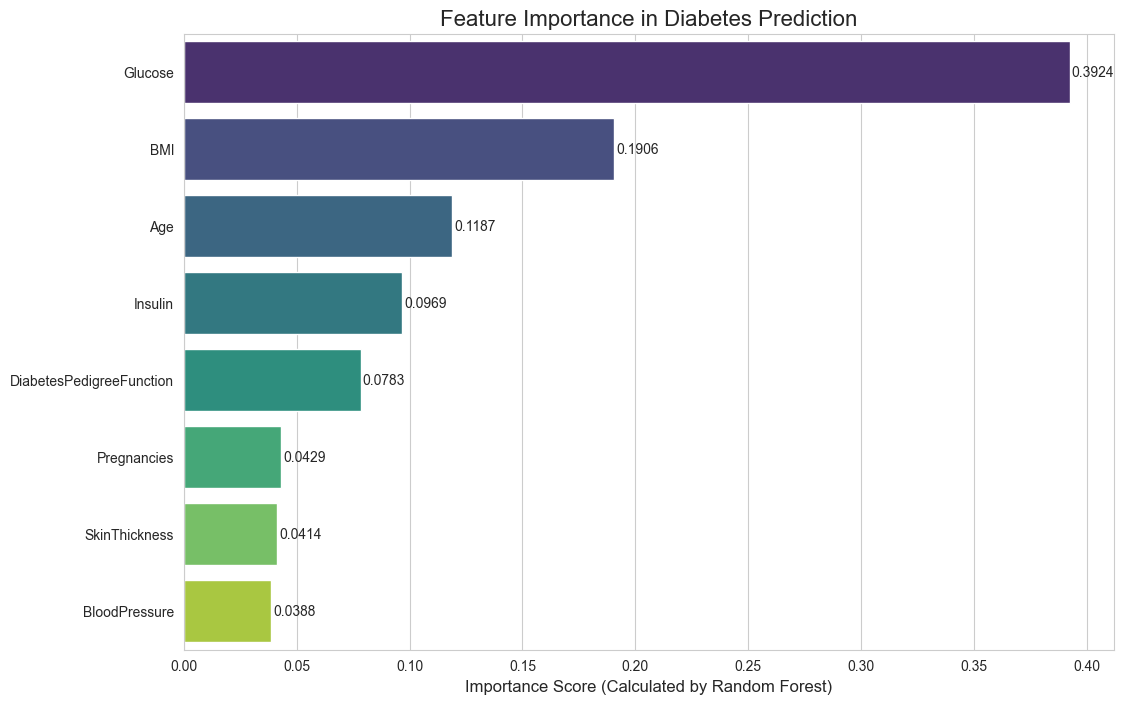

In [95]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

barplot = sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance in Diabetes Prediction', fontsize=16)
plt.xlabel('Importance Score (Calculated by Random Forest)', fontsize=12)
plt.ylabel('')

for p in barplot.patches:
    width = p.get_width()
    plt.text(width + 0.001,  # x-position
             p.get_y() + p.get_height() / 2, # y-position
             f'{width:.4f}',
             va='center')
plt.show()


In [96]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

pipeline_steps = [
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('classifier', final_model)
] 
print("Machine Learning Pipeline Blueprint")
for step in pipeline_steps:
    print(f"Step Name: '{step[0]}', Object: {step[1].__class__.__name__}")

Machine Learning Pipeline Blueprint
Step Name: 'imputer', Object: SimpleImputer
Step Name: 'scaler', Object: StandardScaler
Step Name: 'classifier', Object: RandomForestClassifier


In [97]:
final_pipeline = Pipeline(steps=pipeline_steps)
final_pipeline

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('imputer', ...), ('scaler', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"missing_values missing_values: int, float, str, np.nan, None or pandas.NA, default=np.nanThe placeholder for the missing values. All occurrences of`missing_values` will be imputed. For pandas' dataframes withnullable integer dtypes with missing values, `missing_values`can be set to either `np.nan` or `pd.NA`.",nan
,"strategy strategy: str or Callable, default='mean'The imputation strategy.- If ""mean"", then replace missing values using the mean along each column. Can only be used with numeric data.- If ""median"", then replace missing values using the median along each column. Can only be used with numeric data.- If ""most_frequent"", then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.- If ""constant"", then replace missing values with fill_value. Can be used with strings or numeric data.- If an instance of Callable, then replace missing values using the scalar statistic returned by running the callable over a dense 1d array containing non-missing values of each column... versionadded:: 0.20 strategy=""constant"" for fixed value imputation... versionadded:: 1.5 strategy=callable for custom value imputation.",'median'
,"fill_value fill_value: str or numerical value, default=NoneWhen strategy == ""constant"", `fill_value` is used to replace alloccurrences of missing_values. For string or object data types,`fill_value` must be a string.If `None`, `fill_value` will be 0 when imputing numericaldata and ""missing_value"" for strings or object data types.",None
,"copy copy: bool, default=TrueIf True, a copy of X will be created. If False, imputation willbe done in-place whenever possible. Note that, in the following cases,a new copy will always be made, even if `copy=False`:- If `X` is not an array of floating values;- If `X` is encoded as a CSR matrix;- If `add_indicator=True`.",True
,"add_indicator add_indicator: bool, default=FalseIf True, a :class:`MissingIndicator` transform will stack onto outputof the imputer's transform. This allows a predictive estimatorto account for missingness despite imputation. I

In [98]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv('../extracted_data/diabetes.csv')

cols_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_to_impute] = df[cols_to_impute].replace(0, np.nan)

X = df.drop('Outcome', axis=1)
y = df['Outcome']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of raw X_train:", X_train.shape)
print("Using this raw data to train the entire pipeline.")

print("\nTraining the final_pipeline...")
final_pipeline.fit(X_train.values, y_train.values)

print("\n--- Pipeline Training Complete! ---")
print("The 'final_pipeline' object is now a fully trained, ready-to-use prediction engine.")


Shape of raw X_train: (614, 8)
Using this raw data to train the entire pipeline.

Training the final_pipeline...



--- Pipeline Training Complete! ---
The 'final_pipeline' object is now a fully trained, ready-to-use prediction engine.


c:\Users\G Ajay kumar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


--- Pipeline Predictions on Raw Test Data Generated Successfully ---

--- Classification Report from Pipeline ---
                  precision    recall  f1-score   support

Non-Diabetic (0)       0.84      0.75      0.79       100
    Diabetic (1)       0.62      0.74      0.67        54

        accuracy                           0.75       154
       macro avg       0.73      0.75      0.73       154
    weighted avg       0.76      0.75      0.75       154


--- Confusion Matrix from Pipeline ---


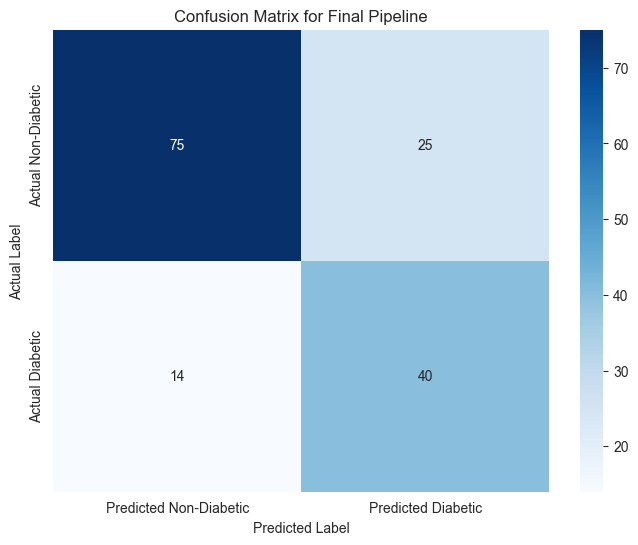



--- Sanity Check: Manual Workflow vs. Pipeline Workflow ---


,Original Random Forest,Final Tuned Random Forest,Pipeline Workflow
Metric,,,
F1-Score,0.6078,0.6723,0.6723
Recall,0.5741,0.7407,0.7407
False Negatives (Critical),23,14,14



Verification Result: The performance metrics should be IDENTICAL between the 'Final Tuned' model and the 'Pipeline'.
This proves our pipeline correctly encapsulates the entire workflow!


In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


y_pred_pipeline = final_pipeline.predict(X_test)

print("--- Pipeline Predictions on Raw Test Data Generated Successfully ---")

report_pipeline = classification_report(
    y_test,
    y_pred_pipeline,
    target_names=['Non-Diabetic (0)', 'Diabetic (1)'],
    output_dict=True
)

print("\n--- Classification Report from Pipeline ---")
print(classification_report(y_test, y_pred_pipeline, target_names=['Non-Diabetic (0)', 'Diabetic (1)']))

print("\n--- Confusion Matrix from Pipeline ---")
cm_pipeline = confusion_matrix(y_test, y_pred_pipeline)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_pipeline,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=['Predicted Non-Diabetic', 'Predicted Diabetic'],
            yticklabels=['Actual Non-Diabetic', 'Actual Diabetic'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Final Pipeline')
plt.show()

print("\n\n--- Sanity Check: Manual Workflow vs. Pipeline Workflow ---")
try:
    pipeline_f1 = report_pipeline['Diabetic (1)']['f1-score']
    pipeline_recall = report_pipeline['Diabetic (1)']['recall']
    pipeline_fn = cm_pipeline[1, 0]  

    verification_df = comparison_df.copy() 
    verification_df['Pipeline Workflow'] = [pipeline_f1, pipeline_recall, pipeline_fn]
    
    display(verification_df.style.format('{:.4f}', subset=pd.IndexSlice[['F1-Score', 'Recall'], :])
                             .format('{:.0f}', subset=pd.IndexSlice[['False Negatives (Critical)'], :])
                             .background_gradient(cmap='Greens', axis=1, subset=pd.IndexSlice[['F1-Score', 'Recall'], :])
                             .highlight_min(subset=pd.IndexSlice[['False Negatives (Critical)'], :], color='lightcoral', axis=1))
    
    print("\nVerification Result: The performance metrics should be IDENTICAL between the 'Final Tuned' model and the 'Pipeline'.")
    print("This proves our pipeline correctly encapsulates the entire workflow!")

except NameError:
    print("\n'comparison_df' not found. Please ensure you have run the final task of the 'Hyperparameter Tuning' step.")
except KeyError as e:
    print(f"\nUnexpected classification report format. Missing key: {e}.")
    print("Ensure the report was generated with target_names=['Non-Diabetic (0)', 'Diabetic (1)'].")


In [100]:
import joblib
import pandas as pd

pipeline_filename = "diabetes_pipeline.joblib"
joblib.dump(final_pipeline, pipeline_filename)

print(f"--- Pipeline Saved Successfully! ---\n")
print(f"The trained pipeline has been saved to the file: '{pipeline_filename}'")
print("This file contains the entire workflow: imputer, scaler, and the final trained model.")

print("\n\n--- Verification Step ---")
print("Loading the pipeline from the file to test it...")

loaded_pipeline = joblib.load(pipeline_filename)

print("Pipeline loaded successfully. Preparing a sample for prediction...")
sample_patient = X_test.iloc[[0]]
prediction = loaded_pipeline.predict(sample_patient)
prediction_probability = loaded_pipeline.predict_proba(sample_patient)

print("\n--- Prediction on a Sample Patient ---")
print("Sample Patient Data:")
display(sample_patient)
print(f"\nModel Prediction (0=Non-Diabetic, 1=Diabetic): {prediction[0]}")
print(f"Prediction Probabilities (for [Non-Diabetic, Diabetic]): {prediction_probability[0]}")


--- Pipeline Saved Successfully! ---

The trained pipeline has been saved to the file: 'diabetes_pipeline.joblib'
This file contains the entire workflow: imputer, scaler, and the final trained model.


--- Verification Step ---
Loading the pipeline from the file to test it...
Pipeline loaded successfully. Preparing a sample for prediction...


c:\Users\G Ajay kumar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(
c:\Users\G Ajay kumar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(



--- Prediction on a Sample Patient ---
Sample Patient Data:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
44,7,159.0,64.0,NaN,NaN,27.4,0.294,40



Model Prediction (0=Non-Diabetic, 1=Diabetic): 1
Prediction Probabilities (for [Non-Diabetic, Diabetic]): [0.22554524 0.77445476]
